In [1]:
!pwd

/home/iamatul12164ine


In [2]:
import os
Root = "/home/iamatul12164ine"
os.chdir(Root)
!pwd

/home/iamatul12164ine


## Multi-class image classification

#### We will proceed here with following steps--
1. Become one with data
2. Preprocess the data
3. create a model ( start with a baseline )
4. Fit the mode ( overfit it to make sure it works )
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat the baseline/ reduce overfitting)
7. Repeat until satisfied.

## 1. Import and become one with the data

In [3]:
try:
    if os.path.exists(os.path.join(os.getcwd(), '10_food_classes_all_data')):
            print(f"file already exists hence, skipping downloading...")
    else:
            import zipfile

            ! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

            ## unzip our data
            zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
            zip_ref.extractall()
            zip_ref.close()

except Exception as e:
      print(e)

file already exists hence, skipping downloading...


In [4]:
## walking through the 10 classes of images dataset

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
      print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 10 directories and 0 images in 10_fo

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import random

def view_random_image(target_dir,target_class):
    target_folder = target_dir+"/"+target_class
    print(target_folder)

  ## Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)

  ## reading the image using matplotlib
    img = mpimage.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") ## show the shape of image

    return img

In [6]:
## Setting up the train and test directories
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [7]:
## Let's retrieve the class names
import numpy as np
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  ## it will sort all the classes into alphabetically order
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


10_food_classes_all_data/train/hamburger
['22093.jpg']
Image shape: (512, 384, 3)


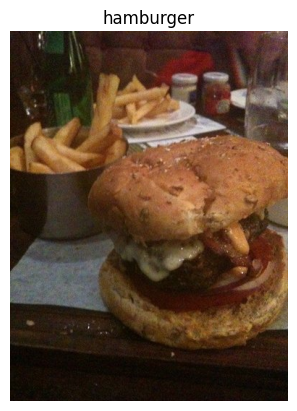

In [8]:
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

### Preprocess the data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              shuffle = True,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = "categorical"
                                              )
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = "categorical",
                                            shuffle = True)





2022-09-20 10:12:40.063511: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-20 10:12:40.063543: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Model creation: Here we can go to cnn explainer site and we will find that even their one of the CNN model is for 10 class classification. So let's use their architecture and try..

In [10]:
## setting the seed
tf.random.set_seed(42)

## model creation
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, input_shape = (224,224,3),activation = 'relu'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

## compiling the model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## fitting the model


2022-09-20 10:12:43.604628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-20 10:12:43.604680: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-20 10:12:43.604706: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e2e2299a7d5c): /proc/driver/nvidia/version does not exist
2022-09-20 10:12:43.605030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [12]:
## Let's fit the model
history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 115s 484ms/step - loss: 2.1280 - accuracy: 0.2244 - val_loss: 1.9508 - val_accuracy: 0.3244
Epoch 2/5
235/235 [==============================] - 105s 448ms/step - loss: 1.8532 - accuracy: 0.3611 - val_loss: 1.8910 - val_accuracy: 0.3404
Epoch 3/5
235/235 [==============================] - 101s 431ms/step - loss: 1.4449 - accuracy: 0.5152 - val_loss: 1.9059 - val_accuracy: 0.3384
Epoch 4/5
235/235 [==============================] - 102s 435ms/step - loss: 0.8353 - accuracy: 0.7256 - val_loss: 2.5701 - val_accuracy: 0.3100
Epoch 5/5
235/235 [==============================] - 101s 430ms/step - loss: 0.3216 - accuracy: 0.8995 - val_loss: 3.4594 - val_accuracy: 0.2952


<AxesSubplot:>

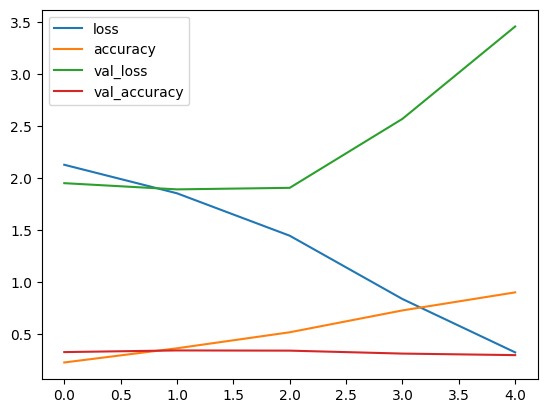

In [13]:
## Let's plot the history
import pandas as pd
pd.DataFrame(history_1.history).plot()

## We saw and found that the model is learning something as the training loss is less but the validation loss is high, which means probably our model is overfitting. To resolve this we would try the following--:
1. Simplifying the model : Removing some layers or some neurons.
2. Data augmentation
3. Transfer learning

### Simplifying the model: Let's remove two convolution layers and check

In [14]:
tf.random.set_seed(43)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3, input_shape = (224,224,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
    
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
    
    

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [16]:
history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 177ms/step - loss: 2.1775 - accuracy: 0.2109 - val_loss: 2.0481 - val_accuracy: 0.2684
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 1.8895 - accuracy: 0.3508 - val_loss: 1.9994 - val_accuracy: 0.2868
Epoch 3/5
235/235 [==============================] - 40s 171ms/step - loss: 1.4396 - accuracy: 0.5275 - val_loss: 2.1063 - val_accuracy: 0.2848
Epoch 4/5
235/235 [==============================] - 53s 225ms/step - loss: 0.8039 - accuracy: 0.7571 - val_loss: 2.4880 - val_accuracy: 0.2852
Epoch 5/5
235/235 [==============================] - 48s 205ms/step - loss: 0.3664 - accuracy: 0.9032 - val_loss: 3.1233 - val_accuracy: 0.2708


<AxesSubplot:>

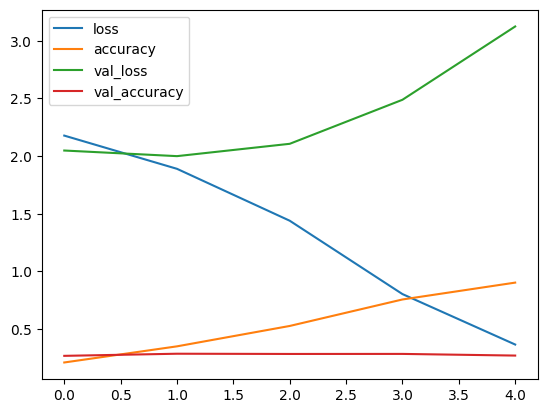

In [17]:
pd.DataFrame(history_2.history).plot()

In [24]:
model_2.evaluate(test_data)

AttributeError: 'Sequential' object has no attribute 'evaludate'

### Looks like there wasn't much change in the accuracy by simplifying the model. Now let's try to use augmented data.

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             width_shift_range = 0.2,
                                             rotation_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir, 
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [22]:
## Let's clone the model_1, it will reset the weight and copy the same architecture
model_3 = tf.keras.models.clone_model(model_1)

## compiling
model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])



In [23]:
## Fitting the model
history_3 = model_3.fit(train_data_augmented, epochs = 5, steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 120s 503ms/step - loss: 2.1929 - accuracy: 0.1944 - val_loss: 2.0327 - val_accuracy: 0.2480
Epoch 2/5
235/235 [==============================] - 119s 507ms/step - loss: 2.0817 - accuracy: 0.2537 - val_loss: 1.9431 - val_accuracy: 0.3024
Epoch 3/5
235/235 [==============================] - 115s 488ms/step - loss: 2.0252 - accuracy: 0.2929 - val_loss: 1.8686 - val_accuracy: 0.3500
Epoch 4/5
235/235 [==============================] - 105s 438ms/step - loss: 1.9881 - accuracy: 0.3100 - val_loss: 1.8686 - val_accuracy: 0.3664
Epoch 5/5
235/235 [==============================] - 100s 422ms/step - loss: 1.9595 - accuracy: 0.3199 - val_loss: 1.7772 - val_accuracy: 0.3892


<AxesSubplot:>

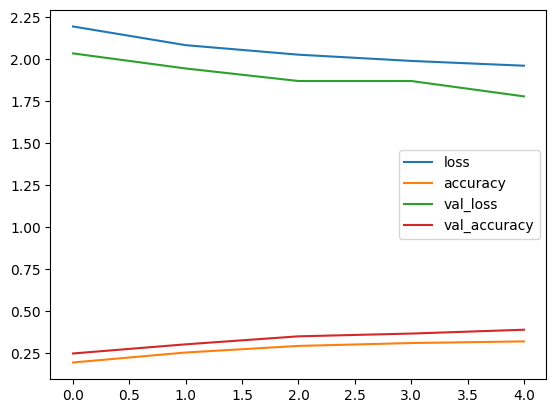

In [25]:
pd.DataFrame(history_3.history).plot()

In [26]:
model_3.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 1.7772 - accuracy: 0.3892


[1.7772327661514282, 0.38920000195503235]

### Looks like data augmentation has increased the accuracy of our model by 9 percentage. There are other methods as well, like changing the hyperparameter of data augmentation, training for longer, tweaking the architecture.

#### Let's try to make some prediction on the custom data

In [28]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2022-09-20 10:46:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.006s  

2022-09-20 10:46:06 (271 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2022-09-20 10:46:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 

In [34]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [35]:
import matplotlib.pyplot as plt
# import matplotlib.mpimage as mimg
def pred_and_plot(model, filename, class_names):
      """
      Imports an image located at filename, makes a prediction on it with
      a trained model and plots the image with the predicted class as the title.
      """
      # Import the target image and preprocess it
      img = load_and_prep_image(filename)

      # Make a prediction
      pred = model.predict(tf.expand_dims(img, axis=0))
        
      ## Adding the logic for multiclass
      if len(pred[0]>1):
            pred_class = class_names[tf.argmax(pred[0])]
      else:
            pred_class = class_names[int(tf.round(pred[0]))]

      # # Get the predicted class
      # pred_class = class_names[int(tf.round(pred)[0][0])]

      # Plot the image and predicted class
      plt.imshow(img)
      plt.title(f"Prediction: {pred_class}")
      plt.axis(False);

1/1 [==============================] - 0s 17ms/step


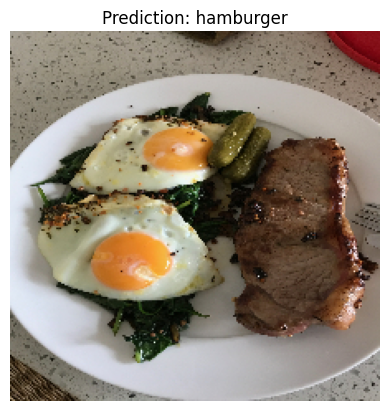

In [37]:
pred_and_plot(model_3,"03-steak.jpeg",class_names)

### Saving and loading our model

In [38]:
model_3.save("food_multiclass_model")

INFO:tensorflow:Assets written to: food_multiclass_model/assets


INFO:tensorflow:Assets written to: food_multiclass_model/assets


In [39]:
model_3.save("food_multiclass_model.h5")

In [41]:
## Loading the model

loaded_model = tf.keras.models.load_model("food_multiclass_model")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

1/1 [==============================] - 0s 57ms/step


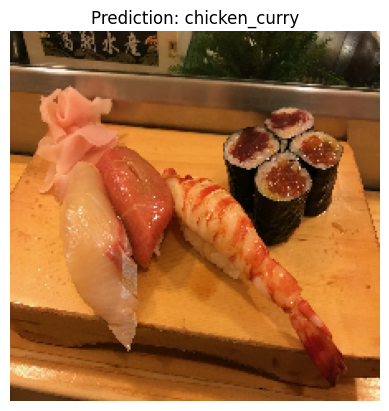

In [42]:
pred_and_plot(loaded_model,"03-sushi.jpeg", class_names)

In [43]:
loaded_model.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 1.7772 - accuracy: 0.3892


[1.777233362197876, 0.38920000195503235]